# Ecuacion del Calor en Torch

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [2]:
# parámetros de la placa y del material
M = 20     # número de puntos en la dirección y
L = 30     # número de puntos en la dirección x
T = 10     # tiempo total de la simulación en segundos
dx = 0.1   # tamaño del paso en la dirección x
dy = 0.1   # tamaño del paso en la dirección y
dt = 0.05  # tamaño del paso en el tiempo
k = 1      # coeficiente de conductividad térmica del material
c = 1      # capacidad calorífica del material
rho = 1    # densidad del material

# condiciones iniciales de la temperatura
u0 = torch.zeros((M, L))
u0[M//4:3*M//4, L//4:3*L//4] = 1

In [3]:
def paso_tiempo(u_actual, dx, dy, dt, k, c, rho):
    # calcular la temperatura en el siguiente paso de tiempo
    u_nuevo = u_actual.clone()
    u_nuevo[1:-1, 1:-1] += (k*dt/(c*rho*dx**2)) * (u_actual[1:-1, :-2] + u_actual[1:-1, 2:] - 2*u_actual[1:-1, 1:-1]) \
                         + (k*dt/(c*rho*dy**2)) * (u_actual[:-2, 1:-1] + u_actual[2:, 1:-1] - 2*u_actual[1:-1, 1:-1])
    return u_nuevo

In [4]:
def simular_placa(u0, dx, dy, dt, k, c, rho, T):
    # calcular el número de pasos de tiempo necesarios
    n_pasos = int(T/dt)

    # inicializar la temperatura de la placa en el tiempo inicial
    u_actual = u0.clone()

    # realizar la simulación en el tiempo especificado
    for n in range(n_pasos):
        # calcular la temperatura en el siguiente paso de tiempo
        u_nuevo = paso_tiempo(u_actual, dx, dy, dt, k, c, rho)
        # actualizar la temperatura actual de la placa
        u_actual[:] = u_nuevo

    # devolver la temperatura final de la placa
    return u_actual

In [5]:
def visualizar_placa(u, t):
    plt.imshow(u.numpy())
    plt.colorbar()
    plt.title(f"Temperatura de la placa en t={t} s")
    plt.show()

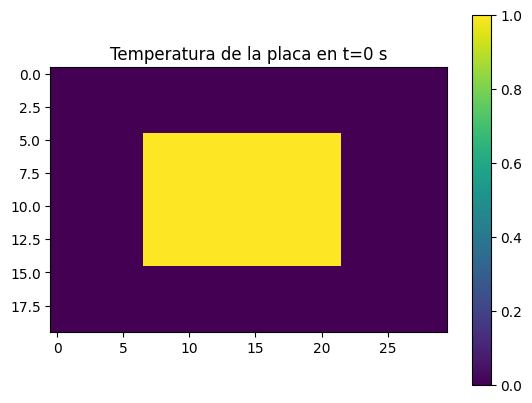

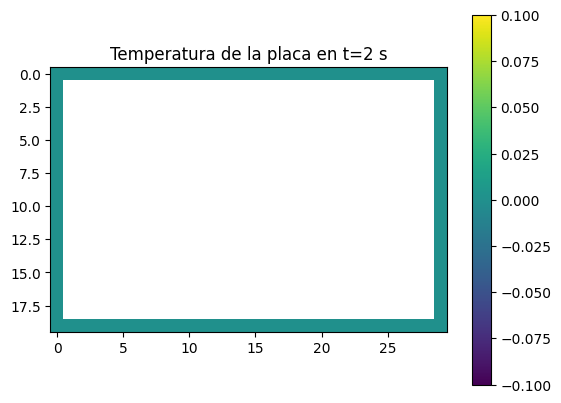

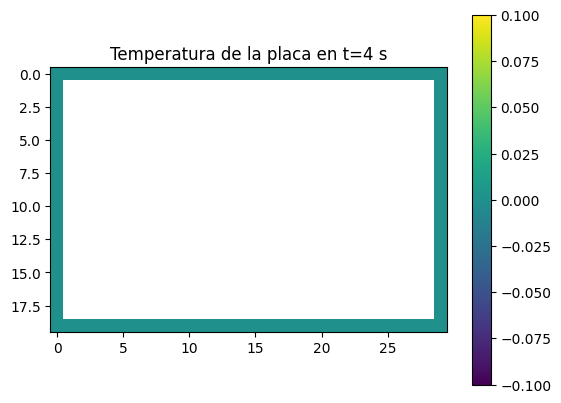

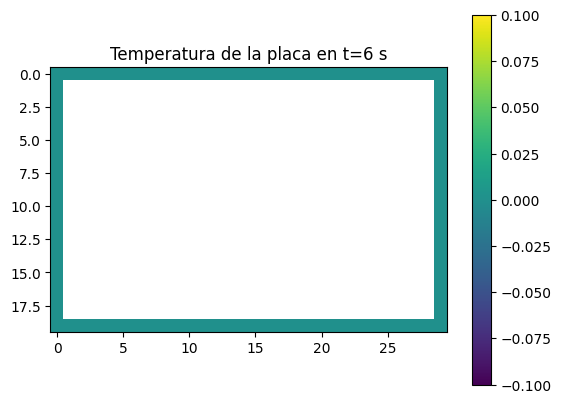

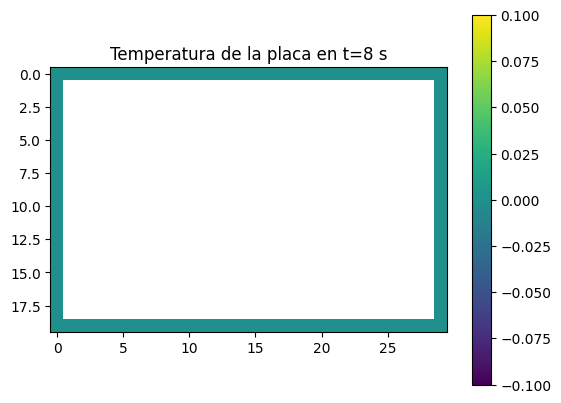

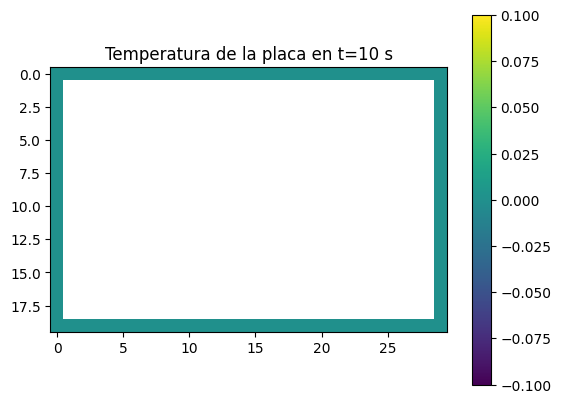

In [6]:
# simular la placa durante el tiempo especificado
u_final = simular_placa(u0, dx, dy, dt, k, c, rho, T)

# visualizar la temperatura en diferentes momentos de la simulación
for t in [0, 2, 4, 6, 8, 10]:
    u_t = simular_placa(u0, dx, dy, dt, k, c, rho, t)
    visualizar_placa(u_t, t)

In [7]:
def actualizar_animacion(i):
    t = i*dt*10  # multiplicamos por 10 para hacer la animación más lenta
    u_t = simular_placa(u0, dx, dy, dt, k, c, rho, t)
    plt.imshow(u_t.numpy())
    plt.colorbar()
    plt.title(f"Temperatura de la placa en t={t:.2f} s")

<Figure size 640x480 with 0 Axes>

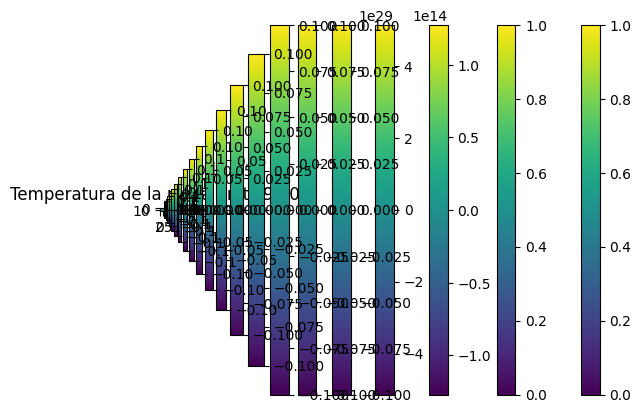

In [8]:
fig = plt.figure()

# crear la animación
animacion = animation.FuncAnimation(fig, actualizar_animacion, frames=int(T/dt/10), interval=50)
plt.show(block=True)
animacion.save('animacion.gif')